In [1]:
!kaggle datasets download -d danilzyryanov/crime-in-berlin-2012-2019

100%|███████████████████████████████████████| 35.8k/35.8k [00:00<00:00, 161kB/s]
100%|███████████████████████████████████████| 35.8k/35.8k [00:00<00:00, 161kB/s]


In [9]:
!pip install geopandas
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 285 kB 455 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A playground notebook to try creating a geographic heat map for Berlin

### References
1. https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55
2. https://stackoverflow.com/a/53645883/10734272

### Data
1. https://lab.technologiestiftung-berlin.de/projects/spatial-units/en/#section_lors
2. https://www.geo.fu-berlin.de/en/v/soga/Geodata-analysis/Spatial-Point-patterns/Berlin-city-data/index.html
3. https://community.tableau.com/s/question/0D54T00000C5ML0SAN/shape-file-of-berlins-neighbourhoods

### Tools that might be useful
1. https://www.react-simple-maps.io/docs/getting-started/
2. https://dev.to/webdevraj/how-to-create-a-choropleth-map-or-geographic-heatmap-in-react-23bm
3. https://github.com/nicosh/react-geo-heatmap
4. https://github.com/luka1199/geo-heatmap

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [29]:
crime_data_filepath = "../input/crime-in-berlin-2012-2019/Berlin_crimes.csv"

data_folder_path = "../data/"
district_areas_folder_path = data_folder_path + "district_areas/"
district_areas_csv_filepath = district_areas_folder_path + "lor_bezirksregionen.csv"
district_areas_shp_filepath = district_areas_folder_path + "shapefiles/lor_planungsraeume.shp"

district_csv_filepath = '../data/districts/bezirksgrenzen.csv'

In [51]:
full_crime_df = pd.read_csv(crime_data_filepath)
full_crime_df

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [52]:
crime_df_2019 = full_crime_df[full_crime_df["Year"]==2019].set_index("Location")
crime_df_2019

,Year,District,Code,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
Location,,,,,,,,,,,,,,,,,,,
Tiergarten Süd,2019,Mitte,10111,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
Regierungsviertel,2019,Mitte,10112,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
Alexanderplatz,2019,Mitte,10113,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
Brunnenstraße Süd,2019,Mitte,10114,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902
Moabit West,2019,Mitte,10221,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nord 2 - Waidmannslust/Wittenau/Lübars,2019,Reinickendorf,123012,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
MV 1 - Märkisches Viertel,2019,Reinickendorf,123021,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
MV 2 - Rollbergsiedlung,2019,Reinickendorf,123022,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212


In [53]:
crime_df_2019.describe()

,Year,Code,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
count,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2019.0,67022.786667,29.300000,17.513333,286.900000,71.693333,97.360000,1335.480000,38.340000,172.680000,189.706667,53.053333,17.440000,7.533333,286.573333,64.233333,122.226667,677.206667
std,0.0,34915.817919,32.167087,21.564555,263.181254,77.243791,73.277012,1358.779223,27.432609,131.079377,182.918273,39.944389,12.535844,5.519540,223.926323,74.659803,217.768461,577.826932
min,2019.0,10111.000000,0.000000,0.000000,3.000000,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000
25%,2019.0,40126.250000,8.250000,4.000000,107.000000,21.000000,43.500000,548.750000,20.250000,78.250000,65.250000,23.500000,8.000000,4.000000,136.250000,17.000000,21.250000,257.500000
50%,2019.0,70151.500000,19.500000,10.000000,223.500000,49.000000,80.000000,951.000000,37.500000,146.000000,123.500000,45.000000,14.000000,6.000000,252.000000,40.000000,45.000000,573.000000
75%,2019.0,90519.750000,36.000000,21.750000,364.250000,84.000000,128.750000,1768.500000,51.000000,241.500000,289.500000,76.750000,24.750000,11.000000,387.000000,89.000000,95.000000,879.500000
max,2019.0,129900.000000,182.000000,150.000000,1966.000000,500.000000,420.000000,11233.000000,156.000000,698.000000,1182.000000,191.000000,55.000000,23.000000,1320.000000,530.000000,1322.000000,3813.000000


In [45]:
pd.read_csv(district_areas_csv_filepath).set_index("BEZIRKSREGION")

,fid,BEZIRKSNAME,PROGNOSERAUM,DATUM_GUELTIG_AB,FLAECHENGROESSE_IN_M2
BEZIRKSREGION,,,,,
Schmöckwitz/Karolinenhof/Rauchfangswerder,lor_planungsraeume.0,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,1.711817e+07
Lichtenrade,lor_planungsraeume.1,Tempelhof-Schöneberg,Lichtenrade,26.10.2007,1.004535e+07
Grünau,lor_planungsraeume.2,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,9.167244e+06
Müggelheim,lor_planungsraeume.3,Treptow-Köpenick,Treptow-Köpenick 4,26.10.2007,2.218451e+07
Bohnsdorf,lor_planungsraeume.4,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,6.659447e+06
...,...,...,...,...,...
Neue Kantstraße,lor_planungsraeume.133,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.488054e+06
Kurfürstendamm,lor_planungsraeume.134,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.367840e+06
Kantstraße,lor_planungsraeume.135,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.122287e+06


In [27]:
data = pd.read_csv(district_areas_csv_filepath)
data

,fid,BEZIRKSNAME,BEZIRKSREGION,PROGNOSERAUM,DATUM_GUELTIG_AB,FLAECHENGROESSE_IN_M2
0,lor_planungsraeume.0,Treptow-Köpenick,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow-Köpenick 3,26.10.2007,1.711817e+07
1,lor_planungsraeume.1,Tempelhof-Schöneberg,Lichtenrade,Lichtenrade,26.10.2007,1.004535e+07
2,lor_planungsraeume.2,Treptow-Köpenick,Grünau,Treptow-Köpenick 3,26.10.2007,9.167244e+06
3,lor_planungsraeume.3,Treptow-Köpenick,Müggelheim,Treptow-Köpenick 4,26.10.2007,2.218451e+07
4,lor_planungsraeume.4,Treptow-Köpenick,Bohnsdorf,Treptow-Köpenick 3,26.10.2007,6.659447e+06
...,...,...,...,...,...,...
133,lor_planungsraeume.133,Charlottenburg-Wilmersdorf,Neue Kantstraße,CW 3,26.10.2007,1.488054e+06
134,lor_planungsraeume.134,Charlottenburg-Wilmersdorf,Kurfürstendamm,CW 3,26.10.2007,1.367840e+06
135,lor_planungsraeume.135,Charlottenburg-Wilmersdorf,Kantstraße,CW 3,26.10.2007,1.122287e+06
136,lor_planungsraeume.136,Charlottenburg-Wilmersdorf,Otto-Suhr-Allee,CW 3,26.10.2007,2.758467e+06


In [34]:
regions = gpd.read_file(district_areas_shp_filepath)

regions

,BEZIRKSNAM,BEZIRKSREG,PROGNOSERA,DATUM_GUEL,FLAECHENGR,geometry
0,Treptow-Köpenick,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow-Köpenick 3,26.10.2007,1.711817e+07,"POLYGON ((411435.067 5804225.560, 411413.534 5..."
1,Tempelhof-Schöneberg,Lichtenrade,Lichtenrade,26.10.2007,1.004535e+07,"POLYGON ((389917.180 5805460.698, 389900.761 5..."
2,Treptow-Köpenick,Grünau,Treptow-Köpenick 3,26.10.2007,9.167244e+06,"POLYGON ((404240.292 5805772.389, 404247.533 5..."
3,Treptow-Köpenick,Müggelheim,Treptow-Köpenick 4,26.10.2007,2.218451e+07,"POLYGON ((413586.219 5806253.336, 413579.982 5..."
4,Treptow-Köpenick,Bohnsdorf,Treptow-Köpenick 3,26.10.2007,6.659447e+06,"POLYGON ((400496.951 5806423.153, 400580.535 5..."
...,...,...,...,...,...,...
133,Charlottenburg-Wilmersdorf,Neue Kantstraße,CW 3,26.10.2007,1.488054e+06,"POLYGON ((384583.512 5818046.849, 384581.927 5..."
134,Charlottenburg-Wilmersdorf,Kurfürstendamm,CW 3,26.10.2007,1.367840e+06,"POLYGON ((385110.786 5817984.020, 385109.149 5..."
135,Charlottenburg-Wilmersdorf,Kantstraße,CW 3,26.10.2007,1.122287e+06,"POLYGON ((384756.638 5819236.669, 384835.564 5..."
136,Charlottenburg-Wilmersdorf,Otto-Suhr-Allee,CW 3,26.10.2007,2.758467e+06,"POLYGON ((386627.142 5820089.231, 386627.434 5..."


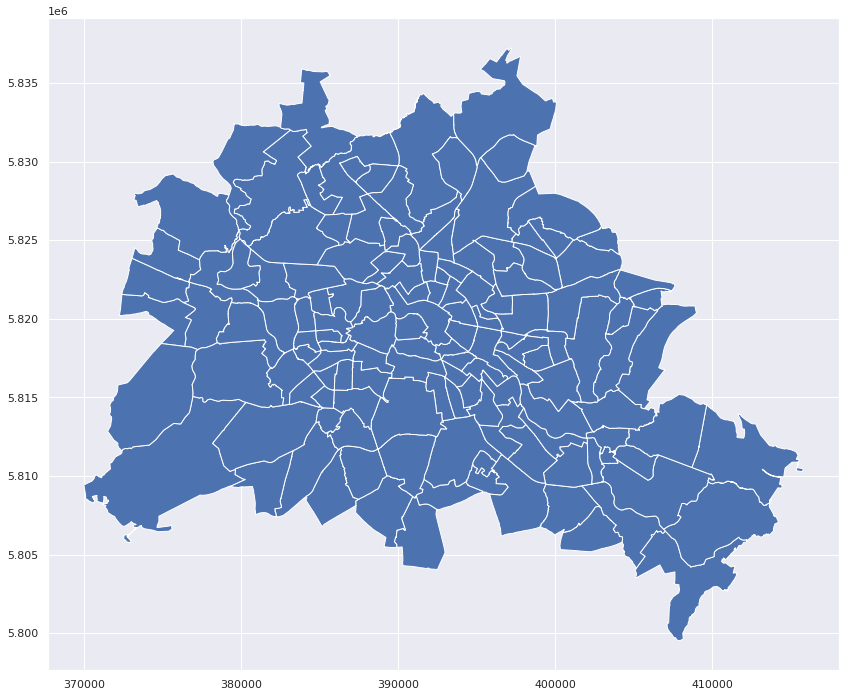

---

# Temporary Workspace

In [41]:
df_2019.index.to_series()

Location
Tiergarten Süd                                                    Tiergarten Süd
Regierungsviertel                                              Regierungsviertel
Alexanderplatz                                                    Alexanderplatz
Brunnenstraße Süd                                              Brunnenstraße Süd
Moabit West                                                          Moabit West
                                                           ...                  
Nord 2 - Waidmannslust/Wittenau/Lübars    Nord 2 - Waidmannslust/Wittenau/Lübars
MV 1 - Märkisches Viertel                              MV 1 - Märkisches Viertel
MV 2 - Rollbergsiedlung                                  MV 2 - Rollbergsiedlung
West 3 - Borsigwalde/Freie Scholle            West 3 - Borsigwalde/Freie Scholle
Bezirk (Rd), nicht zuzuordnen                      Bezirk (Rd), nicht zuzuordnen
Name: Location, Length: 150, dtype: object

In [50]:
pd.read_csv(crime_data_filepath)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [60]:
regions.set_index("BEZIRKSREG")

,BEZIRKSNAM,PROGNOSERA,DATUM_GUEL,FLAECHENGR,geometry
BEZIRKSREG,,,,,
Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,1.711817e+07,"POLYGON ((411435.067 5804225.560, 411413.534 5..."
Lichtenrade,Tempelhof-Schöneberg,Lichtenrade,26.10.2007,1.004535e+07,"POLYGON ((389917.180 5805460.698, 389900.761 5..."
Grünau,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,9.167244e+06,"POLYGON ((404240.292 5805772.389, 404247.533 5..."
Müggelheim,Treptow-Köpenick,Treptow-Köpenick 4,26.10.2007,2.218451e+07,"POLYGON ((413586.219 5806253.336, 413579.982 5..."
Bohnsdorf,Treptow-Köpenick,Treptow-Köpenick 3,26.10.2007,6.659447e+06,"POLYGON ((400496.951 5806423.153, 400580.535 5..."
...,...,...,...,...,...
Neue Kantstraße,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.488054e+06,"POLYGON ((384583.512 5818046.849, 384581.927 5..."
Kurfürstendamm,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.367840e+06,"POLYGON ((385110.786 5817984.020, 385109.149 5..."
Kantstraße,Charlottenburg-Wilmersdorf,CW 3,26.10.2007,1.122287e+06,"POLYGON ((384756.638 5819236.669, 384835.564 5..."


In [64]:
full_crime_df[full_crime_df["Year"]==2019].merge(regions, left_on="Location", right_on="BEZIRKSREG", how="outer", indicator=True).query('_merge != "both"').drop('_merge', 1)

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,...,Damage,Graffiti,Drugs,Local,BEZIRKSNAM,BEZIRKSREG,PROGNOSERA,DATUM_GUEL,FLAECHENGR,geometry
10,2019.0,Mitte,19900.0,"Bezirk (Mi), nicht zuzuordnen",5.0,4.0,19.0,7.0,5.0,94.0,...,15.0,7.0,17.0,34.0,NaN,NaN,NaN,NaN,NaN,None
13,2019.0,Friedrichshain-Kreuzberg,20303.0,nördliche Luisenstadt,94.0,67.0,524.0,215.0,99.0,2509.0,...,407.0,84.0,493.0,1103.0,NaN,NaN,NaN,NaN,NaN,None
14,2019.0,Friedrichshain-Kreuzberg,20304.0,südliche Luisenstadt,182.0,150.0,530.0,251.0,125.0,2343.0,...,519.0,104.0,1310.0,1316.0,NaN,NaN,NaN,NaN,NaN,None
15,2019.0,Friedrichshain-Kreuzberg,20405.0,Karl-Marx-Allee-Nord,38.0,26.0,225.0,58.0,61.0,1260.0,...,298.0,59.0,58.0,634.0,NaN,NaN,NaN,NaN,NaN,None
16,2019.0,Friedrichshain-Kreuzberg,20407.0,Karl-Marx-Allee-Süd,98.0,74.0,787.0,281.0,160.0,3618.0,...,480.0,120.0,770.0,1573.0,NaN,NaN,NaN,NaN,NaN,None
19,2019.0,Friedrichshain-Kreuzberg,29900.0,"Bezirk (Fh-Kb), nicht zuzuordnen",2.0,2.0,4.0,2.0,2.0,38.0,...,3.0,1.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,None
36,2019.0,Pankow,39900.0,"Bezirk (Pk), nicht zuzuordnen",1.0,1.0,11.0,3.0,1.0,53.0,...,8.0,2.0,13.0,18.0,NaN,NaN,NaN,NaN,NaN,None
37,2019.0,Charlottenburg-Wilmersdorf,40101.0,Charlottenburg-Nord,35.0,10.0,316.0,84.0,110.0,1086.0,...,200.0,28.0,216.0,690.0,NaN,NaN,NaN,NaN,NaN,None
54,2019.0,Charlottenburg-Wilmersdorf,49900.0,"Bezirk (Ch-Wi), nicht zuzuordnen",1.0,1.0,3.0,2.0,7.0,40.0,...,4.0,0.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,None
64,2019.0,Spandau,59900.0,"Bezirk (Sp), nicht zuzuordnen",3.0,1.0,7.0,3.0,0.0,17.0,...,4.0,0.0,5.0,12.0,NaN,NaN,NaN,NaN,NaN,None
